In [131]:
import numpy as np
import matplotlib.pyplot as plt

In [132]:
# define plotting parameters

params = {'legend.fontsize': 25,
          'figure.figsize': (8, 6),
         'axes.labelsize': 30,
         'axes.titlesize':25,
         'xtick.labelsize':25,'ytick.labelsize':25,
         'axes.linewidth':4,
         'xtick.major.width':3,'ytick.major.width':3,
         'xtick.minor.width':1,'ytick.minor.width':1,
         'xtick.major.size':5,'ytick.major.size':5,
         'xtick.minor.size':3,'ytick.minor.size':3,
         'xtick.direction':'in','ytick.direction':'in'
         }
plt.rcParams.update(params)

## ala3

In [133]:
# set the value of \beta = 1 / kT for the given simulation in kJ / mol
T = 400
b = 1000. / (1.38 * 6.022 * T)

In [134]:
colvar0 = np.loadtxt('../ala3/driver/COLVAR')
colvar1 = np.loadtxt('../ala3/2/driver/COLVAR')
colvar2 = np.loadtxt('../ala3/3/driver/COLVAR')

big_colvar = np.vstack((colvar0, colvar1, colvar2))

/tmp/ipykernel_1452909/2941870247.py:5: RuntimeWarning: divide by zero encountered in log
  fes0 = -(1 / b) * np.log(hist0.T / hist0.sum())
/tmp/ipykernel_1452909/2941870247.py:10: RuntimeWarning: divide by zero encountered in log
  fes1 = -(1 / b) * np.log(hist1.T / hist1.sum())
/tmp/ipykernel_1452909/2941870247.py:15: RuntimeWarning: divide by zero encountered in log
  fes2 = -(1 / b) * np.log(hist2.T / hist2.sum())
/tmp/ipykernel_1452909/2941870247.py:26: RuntimeWarning: divide by zero encountered in true_divide
  sem_fes = sem_hist * (1 / mean_hist)
/tmp/ipykernel_1452909/2941870247.py:26: RuntimeWarning: invalid value encountered in multiply
  sem_fes = sem_hist * (1 / mean_hist)


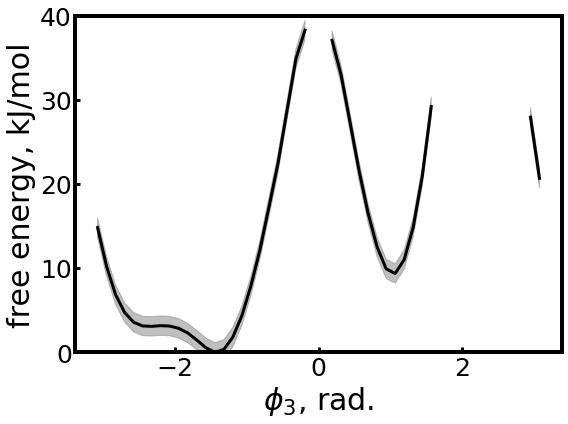

In [135]:
# calculate histogram along the \phi dihedral angle and the associated free-energy surface

hist0, bins0 = np.histogram(colvar0[:,-2], bins = 50)
bins0 = (bins0[1:] + bins0[:-1]) / 2.
fes0 = -(1 / b) * np.log(hist0.T / hist0.sum())
fes0 = fes0 - fes0.min()

hist1, bins1 = np.histogram(colvar1[:,-2], bins = 50)
bins1 = (bins1[1:] + bins1[:-1]) / 2.
fes1 = -(1 / b) * np.log(hist1.T / hist1.sum())
fes1 = fes1 - fes1.min()

hist2, bins2 = np.histogram(colvar2[:,-2], bins = 50)
bins2 = (bins2[1:] + bins2[:-1]) / 2.
fes2 = -(1 / b) * np.log(hist2.T / hist2.sum())
fes2 = fes2 - fes2.min()

mean_hist = np.mean(np.column_stack([hist0 / hist0.sum(), hist1 / hist1.sum(), hist2 / hist2.sum()]), axis = 1)
sem_hist = np.mean(np.column_stack([hist0 / hist0.sum(), hist1 / hist1.sum(), hist2 / hist2.sum()]), axis = 1) / np.sqrt(3.)

mean_bins = (bins0 + bins1 + bins2) / 3.
sem_bins = np.std(np.column_stack([bins0, bins1, bins2]), axis = 1) / np.sqrt(3)

# caculate the error in the free-energy surface using propogation of error
mean_fes = np.mean(np.column_stack([fes0, fes1, fes2]), axis = 1)
sem_fes = sem_hist * (1 / mean_hist)

# error in the free-energy difference, again calculated using propogration of error
deltaF_lr = np.sqrt(2 * 0.57735027**2)

# plot the free-energy surface, with shaded areas corresponding to 
# one standard error of the mean in each direction

plt.plot(mean_bins, mean_fes, lw = 3, c = 'k')
plt.fill_between(bins0, mean_fes, mean_fes + 2 * sem_fes, alpha = 0.5, color = 'grey')
plt.fill_between(bins0, mean_fes - 2 * sem_fes, mean_fes, alpha = 0.5, color = 'grey')
plt.xlabel(r'$\phi_3$, rad.')
plt.ylabel('free energy, kJ/mol')
plt.ylim((0, 40))
plt.tight_layout()
plt.show()
plt.close()

In [136]:
np.savetxt('../ala3_fes.txt', np.column_stack([mean_bins, mean_fes, 2 * sem_fes]))

In [77]:
# find the equilibrium pop[ulations of the left and right-handed states
# use the definition of left- and right-handed states defined in the SI of
# Tsai, Smith, and Tiwary, "SGOOP-d: Estimating Kinetic Distances and 
# Reaction Coordinate Dimensionality for Rare Event Systems from 
# Biased/Unbiased Simulations," JCTC, 17, 2021

lpop0 = lpop1 = lpop2 = 0
rpop0 = rpop1 = rpop2 = 0

llb = -np.pi
lub = -1.
rlb = 0.5
rub = 1.5

for k, phi3 in enumerate(colvar0[:,-2]):
    if (phi3 <= lub) and (phi3 > llb):
        lpop0 += 1
        
    elif (phi3 > rlb) and (phi3 <= rub):
        rpop0 += 1
        
lpop0 = lpop0 / (k + 1)
rpop0 = rpop0 / (k + 1)

for k, phi3 in enumerate(colvar1[:,-2]):
    if (phi3 <= lub) and (phi3 > llb):
        lpop1 += 1
        
    elif (phi3 > rlb) and (phi3 <= rub):
        rpop1 += 1
        
lpop1 = lpop1 / (k + 1)
rpop1 = rpop1 / (k + 1)

for k, phi3 in enumerate(colvar2[:,-2]):
    if (phi3 <= lub) and (phi3 > llb):
        lpop2 += 1
        
    elif (phi3 > rlb) and (phi3 <= rub):
        rpop2 += 1
        
lpop2 = lpop2 / (k + 1)
rpop2 = rpop2 / (k + 1)

mean_lpop = (lpop0 + lpop1 + lpop2) / 3.
sem_lpop = np.std(np.column_stack([lpop0, lpop1, lpop2]), axis = 1) / np.sqrt(3)

mean_rpop = (rpop0 + rpop1 + rpop2) / 3.
sem_rpop = np.std(np.column_stack([rpop0, rpop1, rpop2]), axis = 1) / np.sqrt(3)

print(mean_lpop, r'+/-', float(sem_lpop))
print(mean_rpop, r'+/-', float(sem_rpop))

0.9560133773199561 +/- 0.009351823948340996
0.02836297163702836 +/- 0.009468294228191692


In [78]:
l_bins = (mean_bins > llb) & (mean_bins < lub)
r_bins = (mean_bins > rlb) & (mean_bins < rub)

In [79]:
# free-energy difference over the left- and right-handed regions
# plus the estimate of the uncertainty
l_mean_fes = -(1 / b) * np.log(mean_hist[l_bins].sum())
r_mean_fes = -(1 / b) * np.log(mean_hist[r_bins].sum())

deltal = (np.sqrt((sem_hist[l_bins]**2).sum()) / mean_hist[l_bins].sum()) * np.sqrt((sem_hist[l_bins]**2).sum())
deltar = (np.sqrt((sem_hist[r_bins]**2).sum()) / mean_hist[r_bins].sum()) * np.sqrt((sem_hist[r_bins]**2).sum())
deltalr = np.sqrt(deltal**2 + deltar**2)
print(r_mean_fes - l_mean_fes, '+/-', deltalr)

11.690080031118052 +/- 0.026080255336921234


In [105]:
# reference

ref_fes = np.loadtxt('../references/ala3_webplotdigitizer.csv', delimiter = ',')
ref_hist = np.column_stack([ref_fes[:,0], np.exp(-b * ref_fes[:,1])])
ref_hist[:,1] = ref_hist[:,1] / ref_hist[:,1].sum()
ref_bins = ref_hist[:,0]

ref_l_bins = (ref_bins > llb) & (ref_bins < lub)
ref_r_bins = (ref_bins > rlb) & (ref_bins < rub)
ref_lpop = ref_hist[:,1][ref_l_bins].sum()
ref_rpop = ref_hist[:,1][ref_r_bins].sum()

print(ref_lpop, ref_rpop)

0.9325413758624101 0.033472892481524526


In [109]:
ref_l_fes = -(1 / b) * np.log(ref_hist[:,1][ref_l_bins].sum())
ref_r_fes = -(1 / b) * np.log(ref_hist[:,1][ref_r_bins].sum())

print(ref_r_fes - ref_l_fes)

11.060017422131875


/tmp/ipykernel_1395966/3190789637.py:6: RuntimeWarning: divide by zero encountered in log
  fes0 = -(1 / b) * np.log(hist0.T / hist0.sum())
/tmp/ipykernel_1395966/3190789637.py:11: RuntimeWarning: divide by zero encountered in log
  fes1 = -(1 / b) * np.log(hist1.T / hist1.sum())
/tmp/ipykernel_1395966/3190789637.py:16: RuntimeWarning: divide by zero encountered in log
  fes2 = -(1 / b) * np.log(hist2.T / hist2.sum())
/tmp/ipykernel_1395966/3190789637.py:27: RuntimeWarning: divide by zero encountered in true_divide
  sem_fes = sem_hist * (1 / mean_hist)
/tmp/ipykernel_1395966/3190789637.py:27: RuntimeWarning: invalid value encountered in multiply
  sem_fes = sem_hist * (1 / mean_hist)


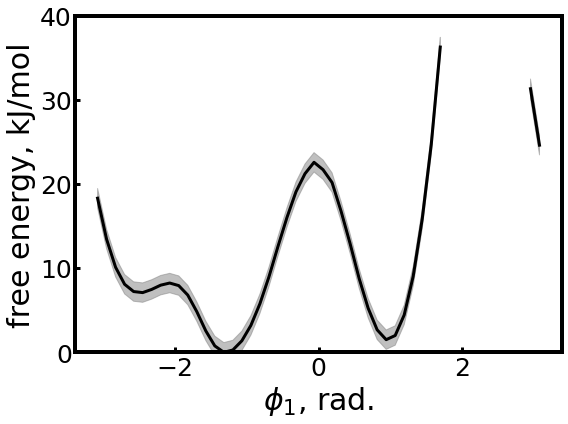

In [237]:
# now repeat the calculation for \phi_1 and \phi_2

# calculate histogram along the \phi dihedral angle and the associated free-energy surface
hist0, bins0 = np.histogram(colvar0[:,1], bins = 50)
bins0 = (bins0[1:] + bins0[:-1]) / 2.
fes0 = -(1 / b) * np.log(hist0.T / hist0.sum())
fes0 = fes0 - fes0.min()

hist1, bins1 = np.histogram(colvar1[:,1], bins = 50)
bins1 = (bins1[1:] + bins1[:-1]) / 2.
fes1 = -(1 / b) * np.log(hist1.T / hist1.sum())
fes1 = fes1 - fes1.min()

hist2, bins2 = np.histogram(colvar2[:,1], bins = 50)
bins2 = (bins2[1:] + bins2[:-1]) / 2.
fes2 = -(1 / b) * np.log(hist2.T / hist2.sum())
fes2 = fes2 - fes2.min()

mean_hist = np.mean(np.column_stack([hist0 / hist0.sum(), hist1 / hist1.sum(), hist2 / hist2.sum()]), axis = 1)
sem_hist = np.mean(np.column_stack([hist0 / hist0.sum(), hist1 / hist1.sum(), hist2 / hist2.sum()]), axis = 1) / np.sqrt(3.)

mean_bins = (bins0 + bins1 + bins2) / 3.
sem_bins = np.std(np.column_stack([bins0, bins1, bins2]), axis = 1) / np.sqrt(3)

# caculate the error in the free-energy surface using propogation of error
mean_fes = np.mean(np.column_stack([fes0, fes1, fes2]), axis = 1)
sem_fes = sem_hist * (1 / mean_hist)

# error in the free-energy difference, again calculated using propogration of error
deltaF_lr = np.sqrt(2 * 0.57735027**2)

# plot the free-energy surface, with shaded areas corresponding to 
# one standard error of the mean in each direction

plt.plot(mean_bins, mean_fes, lw = 3, c = 'k')
plt.fill_between(bins0, mean_fes, mean_fes + 2 * sem_fes, alpha = 0.5, color = 'grey')
plt.fill_between(bins0, mean_fes - 2 * sem_fes, mean_fes, alpha = 0.5, color = 'grey')
plt.xlabel(r'$\phi_1$, rad.')
plt.ylabel('free energy, kJ/mol')
plt.ylim((0, 40))
plt.tight_layout()
plt.show()
plt.close()

In [242]:
# find the equilibrium pop[ulations of the left and right-handed states
# use the definition of left- and right-handed states defined in the SI of
# Tsai, Smith, and Tiwary, "SGOOP-d: Estimating Kinetic Distances and 
# Reaction Coordinate Dimensionality for Rare Event Systems from 
# Biased/Unbiased Simulations," JCTC, 17, 2021

lpop0 = lpop1 = lpop2 = 0
rpop0 = rpop1 = rpop2 = 0

for k, phi3 in enumerate(colvar0[:,1]):
    if (phi3 <= -1) and (phi3 > -np.pi):
        lpop0 += 1
        
    elif (phi3 > 0.5) and (phi3 <= 1.5):
        rpop0 += 1
        
lpop0 = lpop0 / (k + 1)
rpop0 = rpop0 / (k + 1)

for k, phi3 in enumerate(colvar1[:,1]):
    if (phi3 <= -1) and (phi3 > -np.pi):
        lpop1 += 1
        
    elif (phi3 > 0.5) and (phi3 <= 1.5):
        rpop1 += 1
        
lpop1 = lpop1 / (k + 1)
rpop1 = rpop1 / (k + 1)

for k, phi3 in enumerate(colvar2[:,1]):
    if (phi3 <= -1) and (phi3 > -np.pi):
        lpop2 += 1
        
    elif (phi3 > 0.5) and (phi3 <= 1.5):
        rpop2 += 1
        
lpop2 = lpop2 / (k + 1)
rpop2 = rpop2 / (k + 1)

mean_lpop = (lpop0 + lpop1 + lpop2) / 3.
sem_lpop = np.std(np.column_stack([lpop0, lpop1, lpop2]), axis = 1) / np.sqrt(3)

mean_rpop = (rpop0 + rpop1 + rpop2) / 3.
sem_rpop = np.std(np.column_stack([rpop0, rpop1, rpop2]), axis = 1) / np.sqrt(3)

print(mean_lpop, r'+/-', float(sem_lpop))
print(mean_rpop, r'+/-', float(sem_rpop))

0.6305780360886306 +/- 0.0013902916510276145
0.2841653825012842 +/- 0.0015016080299231265


/tmp/ipykernel_1395966/1816916668.py:6: RuntimeWarning: divide by zero encountered in log
  fes0 = -(1 / b) * np.log(hist0.T / hist0.sum())
/tmp/ipykernel_1395966/1816916668.py:11: RuntimeWarning: divide by zero encountered in log
  fes1 = -(1 / b) * np.log(hist1.T / hist1.sum())
/tmp/ipykernel_1395966/1816916668.py:16: RuntimeWarning: divide by zero encountered in log
  fes2 = -(1 / b) * np.log(hist2.T / hist2.sum())
/tmp/ipykernel_1395966/1816916668.py:27: RuntimeWarning: divide by zero encountered in true_divide
  sem_fes = sem_hist * (1 / mean_hist)
/tmp/ipykernel_1395966/1816916668.py:27: RuntimeWarning: invalid value encountered in multiply
  sem_fes = sem_hist * (1 / mean_hist)


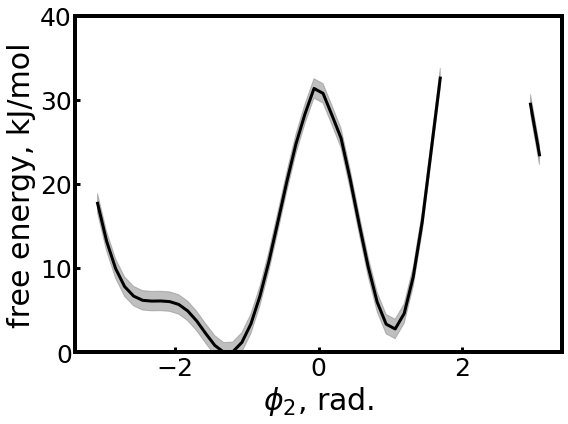

In [239]:
# now repeat the calculation for \phi_1 and \phi_2

# calculate histogram along the \phi dihedral angle and the associated free-energy surface
hist0, bins0 = np.histogram(colvar0[:,3], bins = 50)
bins0 = (bins0[1:] + bins0[:-1]) / 2.
fes0 = -(1 / b) * np.log(hist0.T / hist0.sum())
fes0 = fes0 - fes0.min()

hist1, bins1 = np.histogram(colvar1[:,3], bins = 50)
bins1 = (bins1[1:] + bins1[:-1]) / 2.
fes1 = -(1 / b) * np.log(hist1.T / hist1.sum())
fes1 = fes1 - fes1.min()

hist2, bins2 = np.histogram(colvar2[:,3], bins = 50)
bins2 = (bins2[1:] + bins2[:-1]) / 2.
fes2 = -(1 / b) * np.log(hist2.T / hist2.sum())
fes2 = fes2 - fes2.min()

mean_hist = np.mean(np.column_stack([hist0 / hist0.sum(), hist1 / hist1.sum(), hist2 / hist2.sum()]), axis = 1)
sem_hist = np.mean(np.column_stack([hist0 / hist0.sum(), hist1 / hist1.sum(), hist2 / hist2.sum()]), axis = 1) / np.sqrt(3.)

mean_bins = (bins0 + bins1 + bins2) / 3.
sem_bins = np.std(np.column_stack([bins0, bins1, bins2]), axis = 1) / np.sqrt(3)

# caculate the error in the free-energy surface using propogation of error
mean_fes = np.mean(np.column_stack([fes0, fes1, fes2]), axis = 1)
sem_fes = sem_hist * (1 / mean_hist)

# error in the free-energy difference, again calculated using propogration of error
deltaF_lr = np.sqrt(2 * 0.57735027**2)

# plot the free-energy surface, with shaded areas corresponding to 
# one standard error of the mean in each direction

plt.plot(mean_bins, mean_fes, lw = 3, c = 'k')
plt.fill_between(bins0, mean_fes, mean_fes + 2 * sem_fes, alpha = 0.5, color = 'grey')
plt.fill_between(bins0, mean_fes - 2 * sem_fes, mean_fes, alpha = 0.5, color = 'grey')
plt.xlabel(r'$\phi_2$, rad.')
plt.ylabel('free energy, kJ/mol')
plt.ylim((0, 40))
plt.tight_layout()
plt.show()
plt.close()

In [243]:
# find the equilibrium pop[ulations of the left and right-handed states
# use the definition of left- and right-handed states defined in the SI of
# Tsai, Smith, and Tiwary, "SGOOP-d: Estimating Kinetic Distances and 
# Reaction Coordinate Dimensionality for Rare Event Systems from 
# Biased/Unbiased Simulations," JCTC, 17, 2021

lpop0 = lpop1 = lpop2 = 0
rpop0 = rpop1 = rpop2 = 0

for k, phi3 in enumerate(colvar0[:,3]):
    if (phi3 <= -1) and (phi3 > -np.pi):
        lpop0 += 1
        
    elif (phi3 > 0.5) and (phi3 <= 1.5):
        rpop0 += 1
        
lpop0 = lpop0 / (k + 1)
rpop0 = rpop0 / (k + 1)

for k, phi3 in enumerate(colvar1[:,3]):
    if (phi3 <= -1) and (phi3 > -np.pi):
        lpop1 += 1
        
    elif (phi3 > 0.5) and (phi3 <= 1.5):
        rpop1 += 1
        
lpop1 = lpop1 / (k + 1)
rpop1 = rpop1 / (k + 1)

for k, phi3 in enumerate(colvar2[:,3]):
    if (phi3 <= -1) and (phi3 > -np.pi):
        lpop2 += 1
        
    elif (phi3 > 0.5) and (phi3 <= 1.5):
        rpop2 += 1
        
lpop2 = lpop2 / (k + 1)
rpop2 = rpop2 / (k + 1)

mean_lpop = (lpop0 + lpop1 + lpop2) / 3.
sem_lpop = np.std(np.column_stack([lpop0, lpop1, lpop2]), axis = 1) / np.sqrt(3)

mean_rpop = (rpop0 + rpop1 + rpop2) / 3.
sem_rpop = np.std(np.column_stack([rpop0, rpop1, rpop2]), axis = 1) / np.sqrt(3)

print(mean_lpop, r'+/-', float(sem_lpop))
print(mean_rpop, r'+/-', float(sem_rpop))

0.7510732489267511 +/- 0.0037372581243488756
0.1785964880701786 +/- 0.004475280601507078


## alanine dipeptide

In [137]:
T = 450
b = 1000. / (1.38 * 6.022 * T)

In [138]:
torsions = np.load('../AD/reduced_torsions.npy')
phi = torsions[:,0]

/tmp/ipykernel_1452909/670469606.py:3: RuntimeWarning: divide by zero encountered in log
  fes = -(1 / b) * np.log(hist.T / hist.sum())


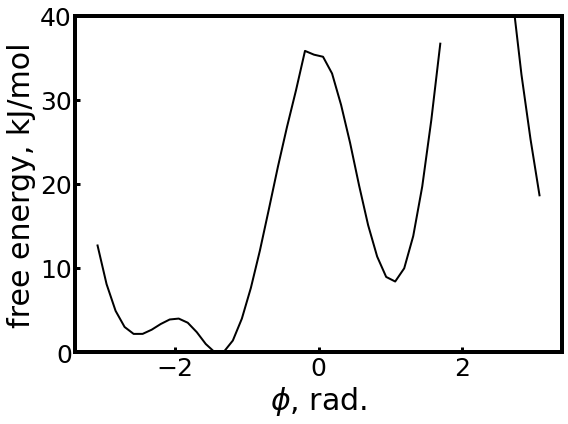

In [139]:
hist, bins = np.histogram(phi, bins = 50)
bins = (bins[1:] + bins[:-1]) / 2.
fes = -(1 / b) * np.log(hist.T / hist.sum())
fes = fes - fes.min()

plt.plot(bins, fes, lw = 2, c = 'k')
#plt.fill_between(bins0, mean_fes, mean_fes + 2 * sem_fes, alpha = 0.5, color = 'grey')
#plt.fill_between(bins0, mean_fes - 2 * sem_fes, mean_fes, alpha = 0.5, color = 'grey')
plt.xlabel(r'$\phi$, rad.')
plt.ylabel('free energy, kJ/mol')
plt.ylim((0, 40))
plt.tight_layout()
plt.show()
plt.close()

In [140]:
# find the equilibrium pop[ulations of the left and right-handed states

lpop = 0
rpop = 0

llb = (-5 * np.pi) / 6
lub = (-np.pi) / 6
rlb = (np.pi) / 6
rub = (np.pi * 130) / 180

for k, phi0 in enumerate(phi):
    if (phi0 <= lub) and (phi0 > llb):
        lpop += 1
        
    elif (phi0 > rlb) and (phi0 <= rub):
        rpop += 1
        
lpop = lpop / (k + 1)
rpop = rpop / (k + 1)

/tmp/ipykernel_1452909/900275774.py:18: RuntimeWarning: divide by zero encountered in log
  fes = -(1 / b) * np.log(hist)


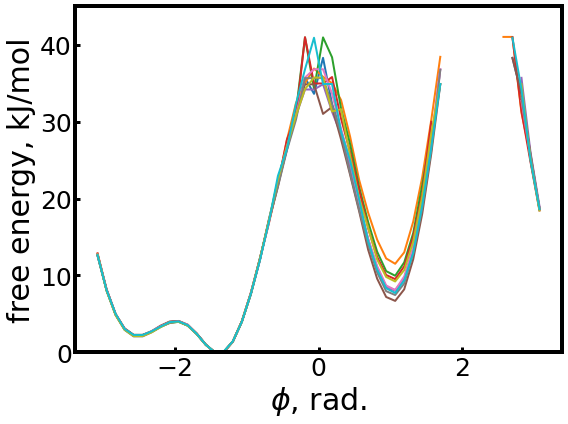

In [141]:
# perform block averaging by dividing the simulation into 10 x 100 ns
# chunks and assume each 1) cointains adequate sampling and 2) is 
# independent of the other blocks (100 ns should be an adequate decorrelation time
# for the given temperature)

deltat = len(phi) // 10
nints = len(phi) // deltat
nbins = 50
hist_list = np.zeros((nbins, nints))
bins_list = np.zeros((nbins, nints))
lpop_list = []
rpop_list = []
for i in range(nints):
    data = phi[i * deltat:(i + 1) * deltat]
    hist, bins = np.histogram(data, bins = 50)
    bins = (bins[1:] + bins[:-1]) / 2.
    hist = hist.T / hist.sum()
    fes = -(1 / b) * np.log(hist)
    fes = fes - fes.min()

    hist_list[:,i] = hist
    bins_list[:,i] = bins
    plt.plot(bins, fes, lw = 2)
    #plt.fill_between(bins0, mean_fes, mean_fes + 2 * sem_fes, alpha = 0.5, color = 'grey')
    #plt.fill_between(bins0, mean_fes - 2 * sem_fes, mean_fes, alpha = 0.5, color = 'grey')
    
    lpop = 0
    rpop = 0

    llb = (-5 * np.pi) / 6
    lub = (-np.pi) / 6
    rlb = (np.pi) / 6
    rub = (np.pi * 130) / 180

    
    for k, phi0 in enumerate(data):
        if (phi0 <= lub) and (phi0 > llb):
            lpop += 1

        elif (phi0 > rlb) and (phi0 <= rub):
            rpop += 1

    lpop = lpop / (k + 1)
    rpop = rpop / (k + 1)
    
    lpop_list.append(lpop)
    rpop_list.append(rpop)
    
plt.xlabel(r'$\phi$, rad.')
plt.ylabel('free energy, kJ/mol')
plt.ylim((0, 45))
plt.tight_layout()
plt.show()
plt.close()

/tmp/ipykernel_1452909/1485175395.py:10: RuntimeWarning: divide by zero encountered in log
  mean_fes = np.mean((-1 / b) * np.log(hist_list), axis = 1)
/tmp/ipykernel_1452909/1485175395.py:12: RuntimeWarning: divide by zero encountered in true_divide
  sem_fes = sem_hist * (1 / mean_hist)
/tmp/ipykernel_1452909/1485175395.py:12: RuntimeWarning: invalid value encountered in multiply
  sem_fes = sem_hist * (1 / mean_hist)


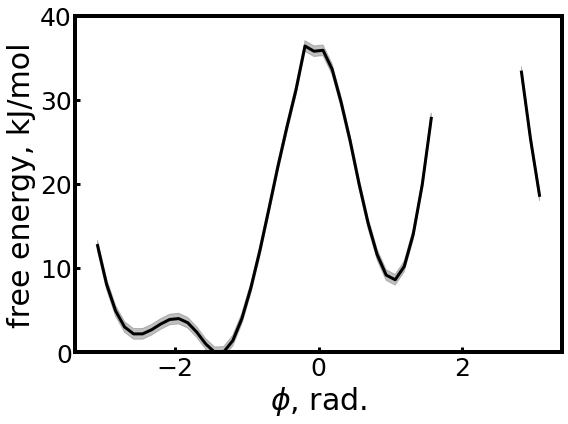

0.8493612 +/- 0.0037367525601784213
0.0414524 +/- 0.004155499323065762


In [142]:
# calculate the uncertainties and plot the free-energy surface along the \phi 
# CV using block-averaged statistics

mean_hist = np.mean(hist_list, axis = 1)
sem_hist = np.mean(hist_list, axis = 1) / np.sqrt(hist_list.shape[1])

mean_bins = np.mean(bins_list, axis = 1)
sem_bins = np.mean(bins_list, axis = 1) / np.sqrt(bins_list.shape[1])

mean_fes = np.mean((-1 / b) * np.log(hist_list), axis = 1)
mean_fes = mean_fes - mean_fes.min()
sem_fes = sem_hist * (1 / mean_hist)

# find the equilibrium pop[ulations of the left and right-handed states
mean_lpop = np.mean(lpop_list)
sem_lpop = np.std(lpop_list) / np.sqrt(nints)

mean_rpop = np.mean(rpop_list)
sem_rpop = np.std(rpop_list) / np.sqrt(nints)

plt.plot(mean_bins, mean_fes, lw = 3, c = 'k')
plt.fill_between(mean_bins, mean_fes, mean_fes + 2 * sem_fes, alpha = 0.5, color = 'grey')
plt.fill_between(mean_bins, mean_fes - 2 * sem_fes, mean_fes, alpha = 0.5, color = 'grey')
plt.xlabel(r'$\phi$, rad.')
plt.ylabel('free energy, kJ/mol')

plt.ylim((0, 40))
plt.tight_layout()
plt.show()
plt.close()

print(mean_lpop,'+/-', sem_lpop)
print(mean_rpop,'+/-', sem_rpop)

In [143]:
np.savetxt('../AD_fes.txt', np.column_stack([mean_bins, mean_fes, 2 * sem_fes]))

In [46]:
l_bins = (mean_bins > llb) & (mean_bins < lub)
r_bins = (mean_bins > rlb) & (mean_bins < rub)

In [57]:
# free-energy difference over the left- and right-handed regions
# plus the estimate of the uncertainty
l_mean_fes = -(1 / b) * np.log(mean_hist[l_bins].sum())
r_mean_fes = -(1 / b) * np.log(mean_hist[r_bins].sum())

deltal = (np.sqrt((sem_hist[l_bins]**2).sum()) / mean_hist[l_bins].sum()) * np.sqrt((sem_hist[l_bins]**2).sum())
deltar = (np.sqrt((sem_hist[r_bins]**2).sum()) / mean_hist[r_bins].sum()) * np.sqrt((sem_hist[r_bins]**2).sum())
deltalr = np.sqrt(deltal**2 + deltar**2)
print(r_mean_fes - l_mean_fes, '+/-', deltalr)

11.332669145587856 +/- 0.007314462284364387


In [40]:
deltaF = mean_fes[33] - mean_fes[mean_fes.argmin()]
print(deltaF, '+/-', np.sqrt(2 * sem_fes[33]))

8.625443178403671 +/- 0.7952707287670506


In [62]:
# reference from the trajectory analyzed in the SPIB paper

ref_traj = np.load('../references/aladip450_traj_data.npy')

In [63]:
ref_traj = ref_traj[::4]

In [64]:
ref_phi = ref_traj[:,0]

/tmp/ipykernel_1452909/3942603177.py:18: RuntimeWarning: divide by zero encountered in log
  fes = -(1 / b) * np.log(hist)


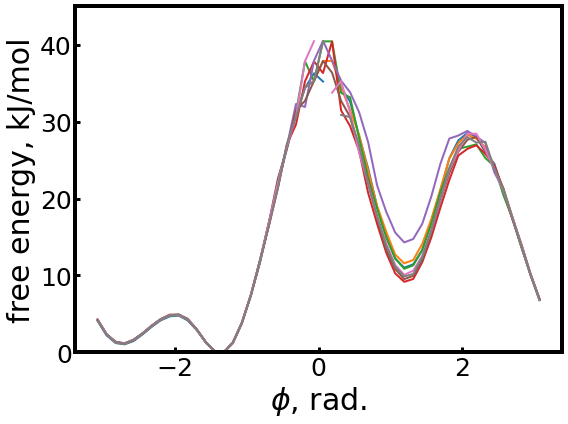

In [66]:
# perform block averaging by dividing the simulation into 10 x 100 ns
# chunks and assume each 1) cointains adequate sampling and 2) is 
# independent of the other blocks (100 ns should be an adequate decorrelation time
# for the given temperature)

deltat = len(ref_phi) // 8
nints = len(ref_phi) // deltat
nbins = 50
ref_hist_list = np.zeros((nbins, nints))
ref_bins_list = np.zeros((nbins, nints))
ref_lpop_list = []
ref_rpop_list = []
for i in range(nints):
    data = ref_phi[i * deltat:(i + 1) * deltat]
    hist, bins = np.histogram(data, bins = 50)
    bins = (bins[1:] + bins[:-1]) / 2.
    hist = hist.T / hist.sum()
    fes = -(1 / b) * np.log(hist)
    fes = fes - fes.min()

    ref_hist_list[:,i] = hist
    ref_bins_list[:,i] = bins
    plt.plot(bins, fes, lw = 2)
    #plt.fill_between(bins0, mean_fes, mean_fes + 2 * sem_fes, alpha = 0.5, color = 'grey')
    #plt.fill_between(bins0, mean_fes - 2 * sem_fes, mean_fes, alpha = 0.5, color = 'grey')
    
    lpop = 0
    rpop = 0

    llb = (-5 * np.pi) / 6
    lub = (-np.pi) / 6
    rlb = (np.pi) / 6
    rub = (np.pi * 130) / 180

    
    for k, phi0 in enumerate(data):
        if (phi0 <= lub) and (phi0 > llb):
            lpop += 1

        elif (phi0 > rlb) and (phi0 <= rub):
            rpop += 1

    lpop = lpop / (k + 1)
    rpop = rpop / (k + 1)
    
    ref_lpop_list.append(lpop)
    ref_rpop_list.append(rpop)
    
plt.xlabel(r'$\phi$, rad.')
plt.ylabel('free energy, kJ/mol')
plt.ylim((0, 45))
plt.tight_layout()
plt.show()
plt.close()

/tmp/ipykernel_1452909/3354354541.py:10: RuntimeWarning: divide by zero encountered in log
  ref_mean_fes = np.mean((-1 / b) * np.log(ref_hist_list), axis = 1)
/tmp/ipykernel_1452909/3354354541.py:12: RuntimeWarning: divide by zero encountered in true_divide
  ref_sem_fes = sem_hist * (1 / mean_hist)
/tmp/ipykernel_1452909/3354354541.py:12: RuntimeWarning: invalid value encountered in multiply
  ref_sem_fes = sem_hist * (1 / mean_hist)


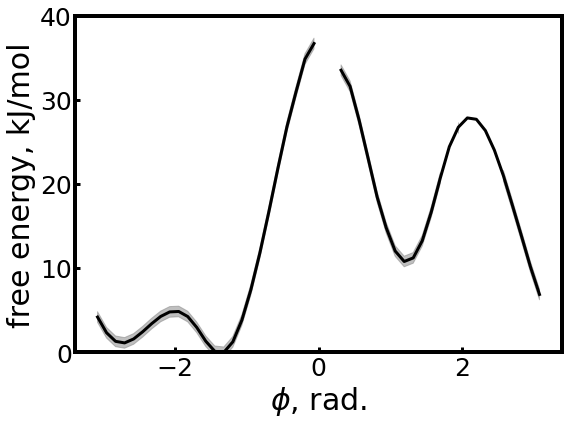

0.7059882499999999 +/- 0.002104081196077642
0.0238395 +/- 0.0027092626245438073


In [71]:
# calculate the uncertainties and plot the free-energy surface along the \phi 
# CV using block-averaged statistics

ref_mean_hist = np.mean(ref_hist_list, axis = 1)
ref_sem_hist = np.mean(ref_hist_list, axis = 1) / np.sqrt(ref_hist_list.shape[1])

ref_mean_bins = np.mean(ref_bins_list, axis = 1)
ref_sem_bins = np.mean(ref_bins_list, axis = 1) / np.sqrt(ref_bins_list.shape[1])

ref_mean_fes = np.mean((-1 / b) * np.log(ref_hist_list), axis = 1)
ref_mean_fes = ref_mean_fes - ref_mean_fes.min()
ref_sem_fes = sem_hist * (1 / mean_hist)

# find the equilibrium pop[ulations of the left and right-handed states
ref_mean_lpop = np.mean(ref_lpop_list)
ref_sem_lpop = np.std(ref_lpop_list) / np.sqrt(nints)

ref_mean_rpop = np.mean(ref_rpop_list)
ref_sem_rpop = np.std(ref_rpop_list) / np.sqrt(nints)

plt.plot(ref_mean_bins, ref_mean_fes, lw = 3, c = 'k')
plt.fill_between(ref_mean_bins, ref_mean_fes, ref_mean_fes + 2 * ref_sem_fes, alpha = 0.5, color = 'grey')
plt.fill_between(ref_mean_bins, ref_mean_fes - 2 * ref_sem_fes, ref_mean_fes, alpha = 0.5, color = 'grey')
plt.xlabel(r'$\phi$, rad.')
plt.ylabel('free energy, kJ/mol')
plt.ylim((0, 40))
plt.tight_layout()
plt.show()
plt.close()

print(ref_mean_lpop,'+/-', ref_sem_lpop)
print(ref_mean_rpop,'+/-', ref_sem_rpop)

In [72]:
# free-energy difference over the left- and right-handed regions
# plus the estimate of the uncertainty
l_ref_mean_fes = -(1 / b) * np.log(ref_mean_hist[l_bins].sum())
r_ref_mean_fes = -(1 / b) * np.log(ref_mean_hist[r_bins].sum())

deltal = (np.sqrt((ref_sem_hist[l_bins]**2).sum()) / ref_mean_hist[l_bins].sum()) * np.sqrt((ref_sem_hist[l_bins]**2).sum())
deltar = (np.sqrt((ref_sem_hist[r_bins]**2).sum()) / ref_mean_hist[r_bins].sum()) * np.sqrt((ref_sem_hist[r_bins]**2).sum())
deltalr = np.sqrt(deltal**2 + deltar**2)
print(r_ref_mean_fes - l_ref_mean_fes, '+/-', deltalr)

12.732789967012314 +/- 0.007920828095636325


## aib9

In [144]:
T = 500
b = 1000. / (1.38 * 6.022 * T)

In [145]:
data = np.load('../AIB9/AIB9_500k/traj_all.npy')
phi = data[:,::2]

# define the CV of interest, which is the sum of the \phi torsion angles
# starting from the third torsion angle and running through the seventh
# (so the middle five torsion angles)

CV = phi[:,2:7].sum(1)

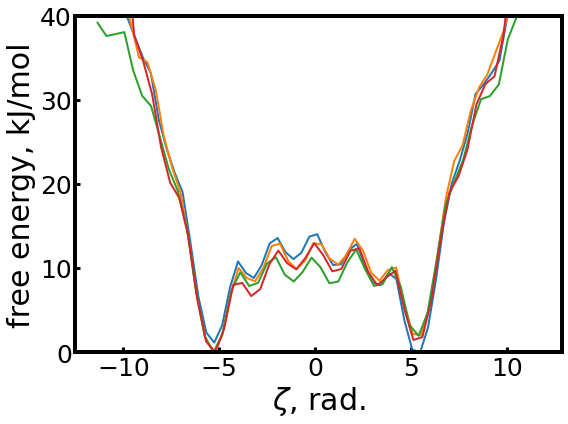

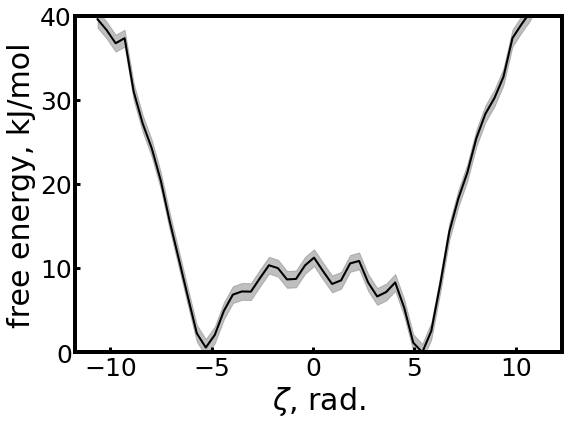

0.14424053222331779 +/- 0.03233471907244893
0.35503049999999997 +/- 0.020690490238573372
0.29448425 +/- 0.030837457181516693


In [147]:
# again, perform block averaging by dividing the simulation into four
# equally sized chunks

deltat = len(CV) // 4
nints = len(CV) // deltat
nbins = 50
hist_list = np.zeros((nbins, nints))
bins_list = np.zeros((nbins, nints))
lpop_list = []
rpop_list = []
for i in range(nints):
    data = CV[i * deltat:(i + 1) * deltat]
    hist, bins = np.histogram(data, bins = 50)
    bins = (bins[1:] + bins[:-1]) / 2.
    hist = hist.T / hist.sum()
    fes = -(1 / b) * np.log(hist)
    fes = fes - fes.min()

    hist_list[:,i] = hist
    bins_list[:,i] = bins
    plt.plot(bins, fes, lw = 2)
    #plt.fill_between(bins0, mean_fes, mean_fes + 2 * sem_fes, alpha = 0.5, color = 'grey')
    #plt.fill_between(bins0, mean_fes - 2 * sem_fes, mean_fes, alpha = 0.5, color = 'grey')
    
    lpop = 0
    rpop = 0

    llb = -6.
    lub = -4.5
    rlb = 4.5
    rub = 6.

    
    for k, phi0 in enumerate(data):
        if (phi0 <= lub) and (phi0 >= llb):
            lpop += 1

        elif (phi0 >= rlb) and (phi0 <= rub):
            rpop += 1

    lpop = lpop / (k + 1)
    rpop = rpop / (k + 1)
    
    lpop_list.append(lpop)
    rpop_list.append(rpop)
    
plt.xlabel(r'$\zeta$, rad.')
plt.ylabel('free energy, kJ/mol')
plt.ylim((0, 40))
plt.tight_layout()
plt.show()
plt.close()

mean_hist = np.mean(hist_list, axis = 1)
sem_hist = np.mean(hist_list, axis = 1) / np.sqrt(hist_list.shape[1])

mean_bins = np.mean(bins_list, axis = 1)
sem_bins = np.mean(bins_list, axis = 1) / np.sqrt(bins_list.shape[1])

mean_fes = np.mean((-1 / b) * np.log(hist_list), axis = 1)
mean_fes = mean_fes - mean_fes.min()
sem_fes = sem_hist * (1 / mean_hist)

# find the equilibrium pop[ulations of the left and right-handed states
mean_lpop = np.mean(lpop_list)
sem_lpop = np.std(lpop_list) / np.sqrt(nints)

mean_rpop = np.mean(rpop_list)
sem_rpop = np.std(rpop_list) / np.sqrt(nints)

plt.plot(mean_bins, mean_fes, lw = 2, c = 'k')
plt.fill_between(mean_bins, mean_fes, mean_fes + 2 * sem_fes, alpha = 0.5, color = 'grey')
plt.fill_between(mean_bins, mean_fes - 2 * sem_fes, mean_fes, alpha = 0.5, color = 'grey')
plt.xlabel(r'$\zeta$, rad.')
plt.ylabel('free energy, kJ/mol')
plt.ylim((0, 40))
plt.tight_layout()
plt.show()
plt.close()

l_bins = (mean_bins > llb) & (mean_bins < lub)
r_bins = (mean_bins > rlb) & (mean_bins < rub)

l_mean_fes = -(1 / b) * np.log(mean_hist[l_bins].sum())
r_mean_fes = -(1 / b) * np.log(mean_hist[r_bins].sum())

deltal = (np.sqrt((sem_hist[l_bins]**2).sum()) / mean_hist[l_bins].sum()) * np.sqrt((sem_hist[l_bins]**2).sum())
deltar = (np.sqrt((sem_hist[r_bins]**2).sum()) / mean_hist[r_bins].sum()) * np.sqrt((sem_hist[r_bins]**2).sum())
deltalr = np.sqrt(deltal**2 + deltar**2)

print(r_mean_fes - l_mean_fes, '+/-', deltalr)

print(mean_lpop,'+/-', sem_lpop)
print(mean_rpop,'+/-', sem_rpop)

In [148]:
np.savetxt('../aib9_fes.txt', np.column_stack([mean_bins, mean_fes, 2 * sem_fes]))

In [120]:
# reference
T = 400
b = 1000. / (1.38 * 6.022 * T)
ref_fes = np.loadtxt('../references/aib9.csv', delimiter = ',')
ref_hist = np.column_stack([ref_fes[:,0], np.exp(-ref_fes[:,1])])
ref_hist[:,1] = ref_hist[:,1] / ref_hist[:,1].sum()
ref_bins = ref_hist[:,0]

ref_l_bins = (ref_bins > llb) & (ref_bins < lub)
ref_r_bins = (ref_bins > rlb) & (ref_bins < rub)
ref_lpop = ref_hist[:,1][ref_l_bins].sum()
ref_rpop = ref_hist[:,1][ref_r_bins].sum()

print(ref_lpop, ref_rpop)

0.1869496945464694 0.3555817809707153


In [117]:
ref_l_fes = -(1 / b) * np.log(ref_hist[:,1][ref_l_bins].sum())
ref_r_fes = -(1 / b) * np.log(ref_hist[:,1][ref_r_bins].sum())

print(ref_r_fes - ref_l_fes)

-0.6688910796010408


In [122]:
# biased test trajectory
zeta = np.load('../AIB9/biased/zeta.npy')
weights = np.load('../AIB9/biased/weights.npy')

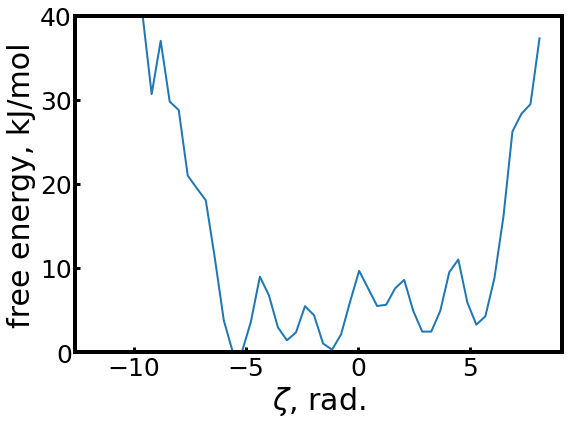

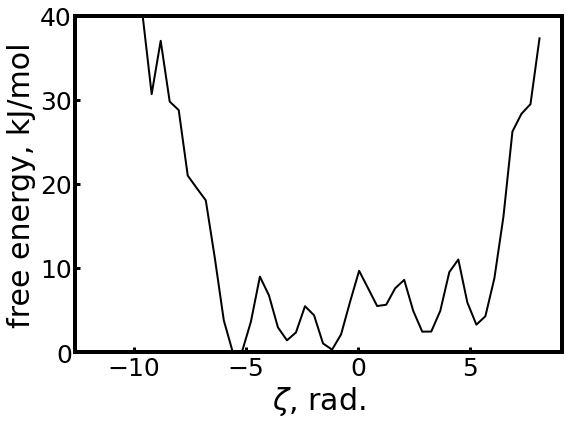

3.919352548476909 +/- 0.08551611304295417
0.25029074482709396 +/- 0.0
0.08403375755093527 +/- 0.0


In [130]:
# again, perform block averaging by dividing the simulation into four
# equally sized chunks

deltat = len(CV) // 1
nints = len(CV) // deltat
nbins = 50
hist_list = np.zeros((nbins, nints))
bins_list = np.zeros((nbins, nints))
lpop_list = []
rpop_list = []
for i in range(nints):
    data = zeta[i * deltat:(i + 1) * deltat]
    hist, bins = np.histogram(data, bins = 50, weights = weights)
    bins = (bins[1:] + bins[:-1]) / 2.
    hist = hist.T / hist.sum()
    fes = -(1 / b) * np.log(hist)
    fes = fes - fes.min()

    hist_list[:,i] = hist
    bins_list[:,i] = bins
    plt.plot(bins, fes, lw = 2)
    #plt.fill_between(bins0, mean_fes, mean_fes + 2 * sem_fes, alpha = 0.5, color = 'grey')
    #plt.fill_between(bins0, mean_fes - 2 * sem_fes, mean_fes, alpha = 0.5, color = 'grey')
    
    lpop = 0
    rpop = 0

    llb = -6.
    lub = -4.5
    rlb = 4.5
    rub = 6.

    
    for k, phi0 in enumerate(data):
        if (phi0 <= lub) and (phi0 >= llb):
            lpop += weights[k]

        elif (phi0 >= rlb) and (phi0 <= rub):
            rpop += weights[k]

    lpop = lpop / weights.sum()
    rpop = rpop / weights.sum()
    
    lpop_list.append(lpop)
    rpop_list.append(rpop)
    
plt.xlabel(r'$\zeta$, rad.')
plt.ylabel('free energy, kJ/mol')
plt.ylim((0, 40))
plt.tight_layout()
plt.show()
plt.close()

mean_hist = np.mean(hist_list, axis = 1)
sem_hist = np.mean(hist_list, axis = 1) / np.sqrt(hist_list.shape[1])

mean_bins = np.mean(bins_list, axis = 1)
sem_bins = np.mean(bins_list, axis = 1) / np.sqrt(bins_list.shape[1])

mean_fes = np.mean((-1 / b) * np.log(hist_list), axis = 1)
mean_fes = mean_fes - mean_fes.min()
sem_fes = sem_hist * (1 / mean_hist)

# find the equilibrium pop[ulations of the left and right-handed states
mean_lpop = np.mean(lpop_list)
sem_lpop = np.std(lpop_list) / np.sqrt(nints)

mean_rpop = np.mean(rpop_list)
sem_rpop = np.std(rpop_list) / np.sqrt(nints)

plt.plot(mean_bins, mean_fes, lw = 2, c = 'k')
#plt.fill_between(mean_bins, mean_fes, mean_fes + 2 * sem_fes, alpha = 0.5, color = 'grey')
#plt.fill_between(mean_bins, mean_fes - 2 * sem_fes, mean_fes, alpha = 0.5, color = 'grey')
plt.xlabel(r'$\zeta$, rad.')
plt.ylabel('free energy, kJ/mol')
plt.ylim((0, 40))
plt.tight_layout()
plt.show()
plt.close()

l_bins = (mean_bins > llb) & (mean_bins < lub)
r_bins = (mean_bins > rlb) & (mean_bins < rub)

l_mean_fes = -(1 / b) * np.log(mean_hist[l_bins].sum())
r_mean_fes = -(1 / b) * np.log(mean_hist[r_bins].sum())

deltal = (np.sqrt((sem_hist[l_bins]**2).sum()) / mean_hist[l_bins].sum()) * np.sqrt((sem_hist[l_bins]**2).sum())
deltar = (np.sqrt((sem_hist[r_bins]**2).sum()) / mean_hist[r_bins].sum()) * np.sqrt((sem_hist[r_bins]**2).sum())
deltalr = np.sqrt(deltal**2 + deltar**2)

print(r_mean_fes - l_mean_fes, '+/-', deltalr)

print(mean_lpop,'+/-', sem_lpop)
print(mean_rpop,'+/-', sem_rpop)